## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [2]:
df3= pd.read_csv("C:/Users/keshi/Downloads/Medical/Model.xlsx")

In [3]:
df3.head()

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0,0,37,1,45,0,0,1,2,1,...,1,1,1,1,2,1,0,2,0,31-65
1,1,1,44,0,45,0,0,0,3,5,...,4,0,1,0,0,1,1,0,0,31-65
2,2,2,32,0,7,0,0,0,3,1,...,2,1,1,2,2,2,2,1,0,31-65
3,3,3,31,0,44,0,1,1,2,2,...,2,2,2,1,0,0,0,1,1,31-65
4,4,4,31,0,45,0,0,0,1,3,...,4,1,1,1,2,2,2,0,0,31-65


In [4]:
#drop unnamed columns
df3 = df3.drop('Unnamed: 0.1', axis=1)
df3 = df3.drop('Unnamed: 0', axis=1)

## Train/Test split

In [5]:
y = df3['treatment']
X = df3.drop(['treatment', 'Age', 'age_range'], axis=1)

In [6]:
len(X), len(y)

(1259, 1259)

In [7]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

### Random Forest Classifier

In [8]:
#creating a tuned model
rf_tuned = RandomForestClassifier()
param_grid = [
    {'n_estimators' : list(range(100,300,50))}
]
clf_rf = GridSearchCV(rf_tuned, param_grid, cv=6)
best_model_rf = clf_rf.fit(X_train, y_train)
print('Best params:', best_model_rf.best_estimator_.get_params())

Best params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [9]:
ytest_pred_rf = best_model_rf.predict(X_test)
accuracy_score(y_test, ytest_pred_rf)

0.8306878306878307

In [10]:
print("Confusion Matrix", confusion_matrix(y_test, ytest_pred_rf))
print("Classification Report", classification_report(y_test, ytest_pred_rf))

Confusion Matrix [[157  41]
 [ 23 157]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.79      0.83       198
           1       0.79      0.87      0.83       180

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



In [11]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:,1]

In [12]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

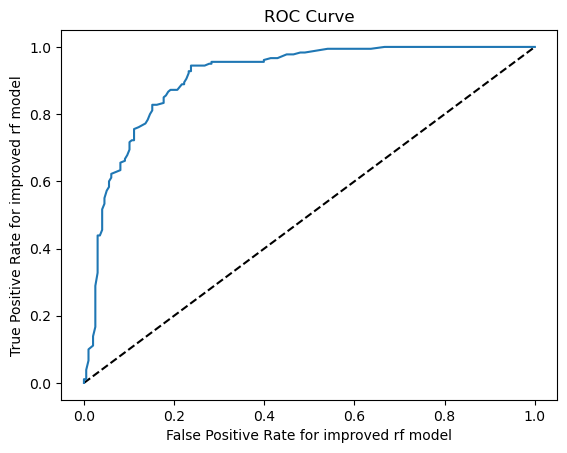

In [13]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate for improved rf model')
plt.ylabel('True Positive Rate for improved rf model')
plt.title('ROC Curve')
plt.show()

In [14]:
rf = RandomForestClassifier(n_estimators=800)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

In [15]:
rf_predictions = rf.predict(X_test)

In [16]:
print(accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

0.8306878306878307
[[155  43]
 [ 21 159]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       198
           1       0.79      0.88      0.83       180

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.84      0.83      0.83       378



### SVM Classifier 

In [17]:
# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svc_model=svclassifier.fit(X_train, y_train)

In [18]:
# predict the values
y_pred = svclassifier.predict(X_test)

In [19]:
def get_test_report(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Compute classification report
    class_report = classification_report(y_test, y_pred)
    
    # Return both the confusion matrix and the classification report
    return conf_matrix, class_report

# Assuming svc_model is already trained and X_test, y_test are defined
conf_matrix, class_report = get_test_report(svc_model, X_test, y_test)

# Print the performance measures
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[156  42]
 [ 22 158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       198
           1       0.79      0.88      0.83       180

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.84      0.83      0.83       378



In [20]:
from sklearn import svm
#Define the parameter grid
param_grid_svc = [
    {'C': [1, 10, 100], 'kernel': ['linear']}
]

# Initialize the SVM model
svm_model_tuned = svm.SVC()

# Setup GridSearchCV with the defined parameters
svm_tuned = GridSearchCV(svm_model_tuned, param_grid_svc, cv=5)

# Fit the GridSearchCV model
svm_tuned.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print('Best C:', svm_tuned.best_estimator_.get_params()['C'])
print('Best gamma:', svm_tuned.best_estimator_.get_params()['gamma'])

# Make predictions on the test set
y_test_pred = svm_tuned.predict(X_test)

# Print prediction and evaluation metrics
print('Predictions:', y_test_pred)
print('Accuracy Score:', accuracy_score(y_test, y_test_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

Best C: 10
Best gamma: scale
Predictions: [1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1
 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1
 1 1 1 1 0 0 1 0]
Accuracy Score: 0.8306878306878307
Confusion Matrix:
 [[156  42]
 [ 22 158]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79 

Both precision and recall are similar for classes 0 and 1, indicating balanced performance.

The model correctly classifies 83% of the test instances, which is quite good.

Both classes have high precision and recall values, suggesting that the model is effective at identifying both true 
positives and true negatives.

The F1-score being the same for both classes indicates a good balance between precision and recall.

Overall, the model performs well with a balanced performance across both classes, making it reliable for the binary 
classification task at hand.

# Conclusion 

Random Forest Classifier  has a slightly higher accuracy (0.84) compared to the second model SVM (0.83). For both 
classes (0 and 1), the precision(0.88, 0.80), recall(0.80, 0.88), and F1-score(0.84 , 0.84) are marginally higher 
in the first report(Random Forest Classifier) compared to the SVM report. Also, its macro and weighted averages 
are consistently higher.

Conduct regular anonymous surveys and request permission from employees to use their responses for modeling purposes. 
Utilize the Random Forest Classifier model to predict whether an employee has sought treatment for mental illness. 

Continuously train the model with new data to enhance its accuracy.

### Awareness Programs

1. Highlighting the Issue and Importance of Treatment: Raise awareness about the widespread nature of mental health issues and the critical importance of seeking treatment.


    
    

2. Reducing Stigma in the Workplace: Develop initiatives to remove the stigma associated with discussing mental health at work.
    

3. Promoting a Healthy Lifestyle: Encourage participation in existing programs that support a healthy lifestyle, such as yoga classes and fitness 
    subsidies.
    

4. Mental Health Benefits and Care Options: Inform employees about existing mental health benefits and care options available to them.
    
    
5. Gender Gap in Treatment Seeking: Focus on bridging the gap in seeking treatment between genders.
    

### Data Collection and Impact Assessment

1. Happiness and Productivity Index: Collect data on employee happiness and productivity as part of the survey to assess the impact of these programs.
    
 
 2. Monitoring Work Interference: Track responses in the work interference column to see if the proportion of "NA" and "Never" increases over time while "Often," "Rarely," and "Sometimes" decrease. This would indicate that employees are either recovering from their illnesses or receiving effective treatment that minimizes work interference.
    

### Goal: 
Fostering a happy and healthy workforce will likely lead to happier and healthier lives outside of work as well.